## TEST2 
objective : To see how the Model performs with less number of input features.

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import  StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

In [71]:
#defining the csv path
path_csv = "../Neuro_Ninjas/Resources/Stroke_prediction_Data.csv"

#reading the csv into pandas dataframe 
stroke_df = pd.read_csv(path_csv)

#display the dataframe 
stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Data Cleaning


In [72]:
# Columns to drop 
columns_to_drop = ['id', 'gender', 'ever_married', 'work_type','Residence_type', 'smoking_status']

# Drop the specified columns
stroke_df2 = stroke_df.drop(columns=columns_to_drop)

# Display the new DataFrame
stroke_df2.head(5)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
1,61.0,0,0,202.21,NaN,1
2,80.0,0,1,105.92,32.5,1
3,49.0,0,0,171.23,34.4,1
4,79.0,1,0,174.12,24.0,1


In [73]:
#display the number of rows and columns 
stroke_df2.shape

(5110, 6)

In [74]:
#check the data type
stroke_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                5110 non-null   float64
 1   hypertension       5110 non-null   int64  
 2   heart_disease      5110 non-null   int64  
 3   avg_glucose_level  5110 non-null   float64
 4   bmi                4909 non-null   float64
 5   stroke             5110 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 239.7 KB


In [75]:
#display the statistical details of the dataset
stroke_df2.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [76]:
#to check the existing Duplicate row in the dataframe 
stroke_df2.duplicated().sum()

0

In [77]:
#creating a copy of dataframe 
stroke_df3 = stroke_df2.copy()

#display datframe
stroke_df3 

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
1,61.0,0,0,202.21,NaN,1
2,80.0,0,1,105.92,32.5,1
3,49.0,0,0,171.23,34.4,1
4,79.0,1,0,174.12,24.0,1
...,...,...,...,...,...,...
5105,80.0,1,0,83.75,NaN,0
5106,81.0,0,0,125.20,40.0,0
5107,35.0,0,0,82.99,30.6,0
5108,51.0,0,0,166.29,25.6,0


In [78]:
#to check for missing values (NaNs) in the  DataFrame
stroke_df3.isna().sum()

age                    0
hypertension           0
heart_disease          0
avg_glucose_level      0
bmi                  201
stroke                 0
dtype: int64

In [79]:
#Replacing NaN with mean bmi
bmi_mean = stroke_df['bmi'].mean()
stroke_df3['bmi'].fillna(value=bmi_mean, inplace=True)
bmi_mean

28.893236911794666

In [80]:
#checking the Nans in the cleaned dataframe 

stroke_df3.isna().sum().sum()

0

In [81]:
stroke_df3.head(10) #displaying the dataframe after all the changes have been made

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.600000,1
1,61.0,0,0,202.21,28.893237,1
2,80.0,0,1,105.92,32.500000,1
3,49.0,0,0,171.23,34.400000,1
4,79.0,1,0,174.12,24.000000,1
5,81.0,0,0,186.21,29.000000,1
6,74.0,1,1,70.09,27.400000,1
7,69.0,0,0,94.39,22.800000,1
8,59.0,0,0,76.15,28.893237,1
9,78.0,0,0,58.57,24.200000,1


## Exploratory data Analysis


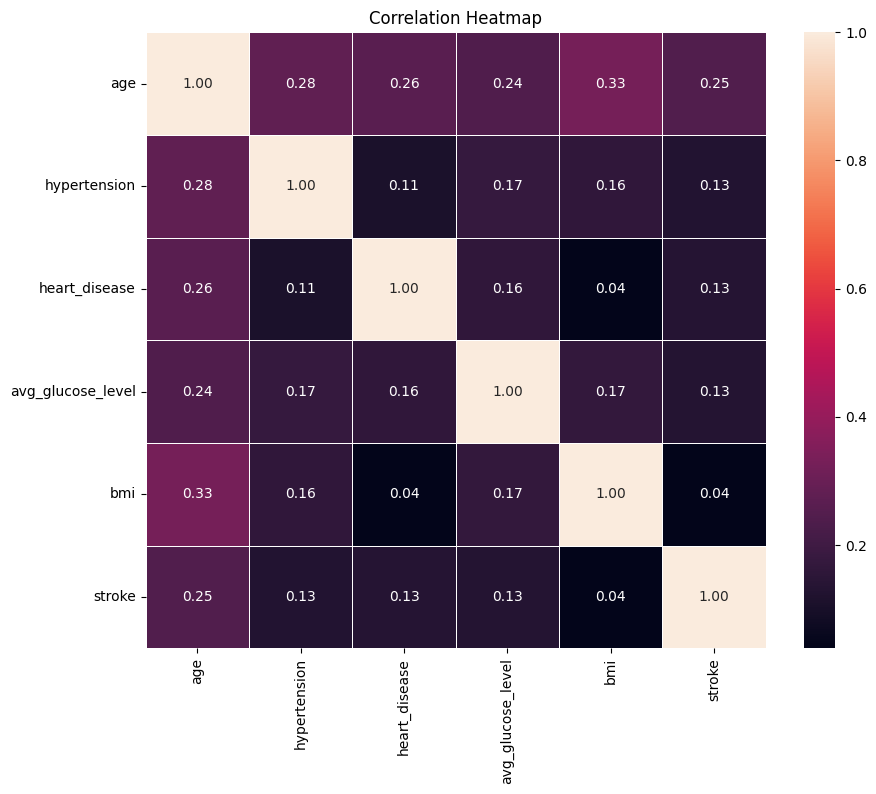

<Figure size 640x480 with 0 Axes>

In [ ]:
# Correlation Heatmap
correlation_matrix = stroke_df3.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.savefig("./Images/correlation_matrix.png")
plt.show()


In [83]:
# Scale age, avg_glucose_level and bmi
scaler = StandardScaler()
stroke_df3[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(stroke_df3[['age', 'avg_glucose_level', 'bmi']])
stroke_df3.head()

#copy strokeinfo_drop_df into new dataframe strokeinfo2_df
stroke_df4 = stroke_df3.copy()
stroke_df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                5110 non-null   float64
 1   hypertension       5110 non-null   int64  
 2   heart_disease      5110 non-null   int64  
 3   avg_glucose_level  5110 non-null   float64
 4   bmi                5110 non-null   float64
 5   stroke             5110 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 239.7 KB


In [86]:
# Remove stroke target from features data
X1=stroke_df4.drop('stroke',axis=1,inplace=False)
y1=stroke_df4['stroke']

# Split training/test datasets

from sklearn.model_selection import train_test_split # dependency imported

#split the stroke_df1 dataset into x_train and x_test and y_train and y_test
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)




from imblearn.combine import SMOTEENN # import the needed dpendency

# Use SMOTEEN for oversampling
smote_enn = SMOTEENN(random_state=42)
X1_resampled, y1_resampled = smote_enn.fit_resample(X1_train, y1_train)

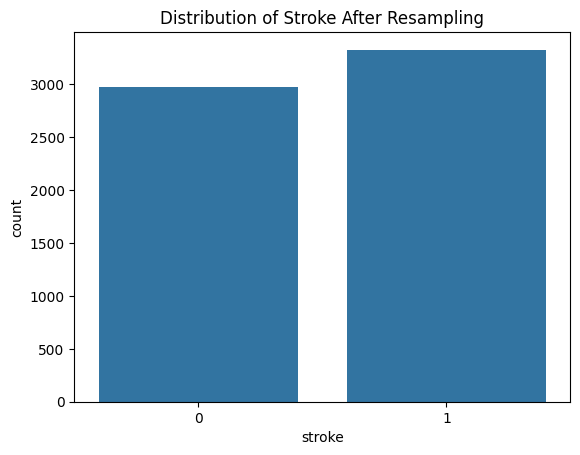

stroke
1    3326
0    2973
Name: count, dtype: int64


In [87]:
#Checking after applying SMOTEEN
# Convert y_resampled to DataFrame
y1_resampled_df = pd.DataFrame(y1_resampled, columns=['stroke'])

#create countplot with seaborn
ax = sns.countplot(x='stroke', data=y1_resampled_df)
#Display the Count Plot:
plt.title("Distribution of Stroke After Resampling") 
plt.show()
#Print Value Counts:
print(y1_resampled_df['stroke'].value_counts())

In [88]:
# Scale the predictor using StandardScaler

scaler = StandardScaler() # Instantiate the StandardScaler

X1_resampled_scaled = scaler.fit_transform(X1_resampled) #scaling the X1_resample (train) 

X1_test_scaled = scaler.transform(X1_test) #scaling the X1_test data

In [89]:
from sklearn.svm import SVC #import svc dependency
model = SVC(kernel='linear',random_state=42) #definng the svc model
model.fit(X1_resampled_scaled, y1_resampled) #fitting the train data with the mdoel

SVC(kernel='linear', random_state=42)

In [91]:
#Define the evaluation function
def evaluate_preds(y1_true, y1_predict): 
    """
    Evaluate predictions with accuracy, confusion matrix and classification report. 
    """
    accuracy = accuracy_score(y1_true, y1_predict)
    conf_matrix = confusion_matrix(y1_true, y1_predict)
    class_report = classification_report(y1_true, y1_predict)

    return {
        "accuracy": accuracy,
        "confusion_matrix": confusion_matrix,
        "classification_report": classification_report
    }

# Define target names based on unique values in y_test 
target_names = ['No Stroke', 'Stroke']

y1_predict = model.predict(X1_test_scaled)

model_metrics = evaluate_preds(y1_test,y1_predict)

print(classification_report(y1_test, y1_predict,
                            target_names=target_names))

              precision    recall  f1-score   support

   No Stroke       0.98      0.72      0.83       960
      Stroke       0.16      0.82      0.27        62

    accuracy                           0.72      1022
   macro avg       0.57      0.77      0.55      1022
weighted avg       0.93      0.72      0.80      1022



In [94]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X1_test_scaled, y1_test))

Test Acc: 0.724


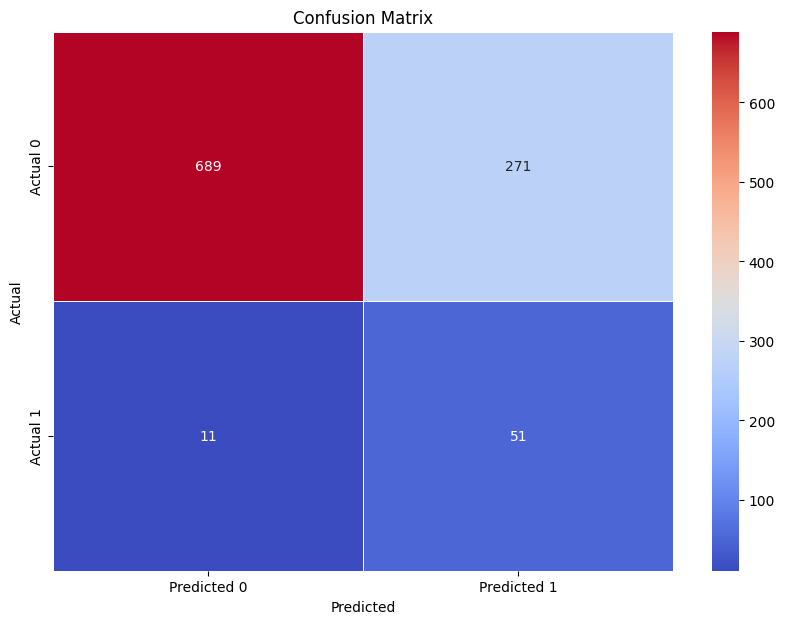

In [95]:
cm1 = confusion_matrix(y1_test, y1_predict)
cm_df1 = pd.DataFrame(
    cm1, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)
cm_df1 

# Plot the confusion matrix using seaborn 
plt.figure(figsize=(10, 7)) 
sns.heatmap(cm_df1, annot=True,fmt='d', cmap='coolwarm', linewidths=.5) 
plt.title('Confusion Matrix') 
plt.xlabel('Predicted') 
plt.ylabel('Actual') 
plt.show()
